# Exercise 4.9 Part 2 - Visualizations 

## 01 Importing Libraries and Data 

In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy 

In [2]:
path = r'/Users/brookecoffey/10-07-2023 Instacart Basket Analysis'

In [4]:
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

## 02 Data Checks

In [5]:
cust_ords_prods.head(5)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,married_status,income,...,busiest_day,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,median_days_since_prior_order,frequency_tag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Mid-range product,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular Customer


In [6]:
cust_ords_prods.shape

(30629741, 33)

In [7]:
# Updating prices > 100 to Null
cust_ords_prods.loc[cust_ords_prods['prices'] >100, 'prices'] = np.nan

In [8]:
# Dropping null prices from existing working dataframe 
cust_ords_prods = cust_ords_prods[cust_ords_prods['prices'].isnull() == False]

In [9]:
cust_ords_prods.shape

(30624960, 33)

In [23]:
cust_ords_prods.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'married_status', 'income', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_order_price',
       'spending_flag', 'median_days_since_prior_order', 'frequency_tag'],
      dtype='object')

# 03 Summary Visualizations 

### 03a Bar Chart 

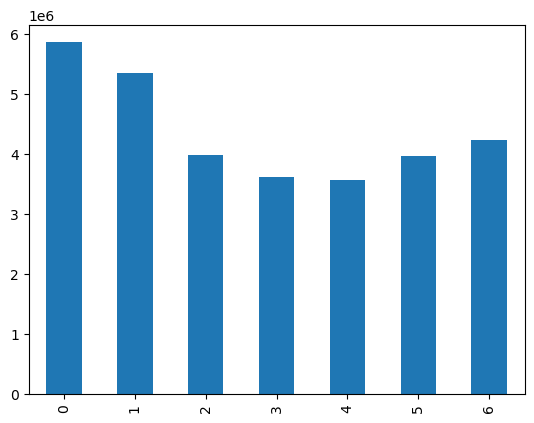

In [11]:
bar = cust_ords_prods['order_day_of_week'].value_counts().sort_index().plot.bar()

### 03b Histogram

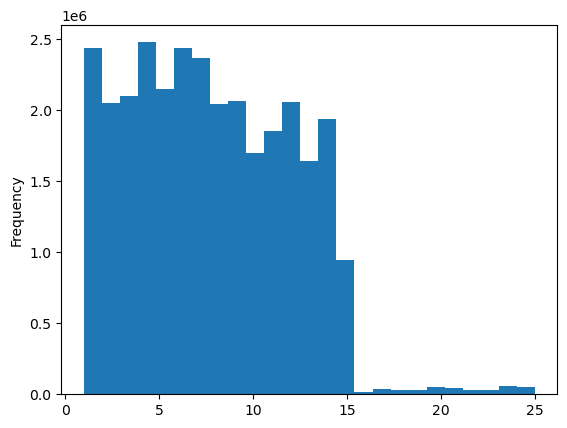

In [12]:
hist = cust_ords_prods['prices'].plot.hist(bins=25)

### 03c Scatterplot

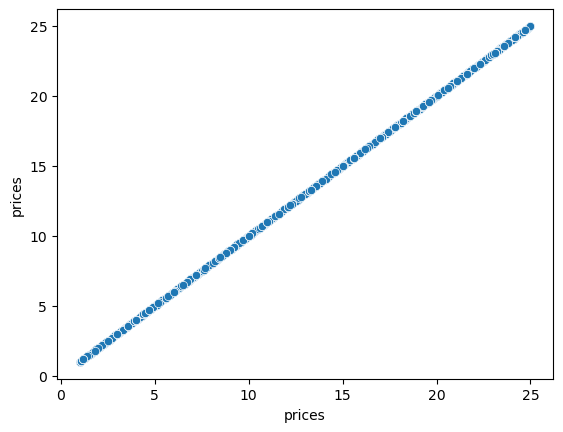

In [13]:
scatter = sns.scatterplot(data = cust_ords_prods, x = 'prices' , y ='prices' )

### 03d Line Chart 

In [14]:
# create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods)) <= 0.7

In [15]:
# creating two dataframes to split the sample into two sub-samples
# 70% of sample should be in dataframe big
# 30% of sample should be in dataframe small
big = cust_ords_prods[dev]
small = cust_ords_prods[~dev]

In [16]:
# double check that the two sub-samples are correctly accounting for the whole dataframe
len(cust_ords_prods)

30624960

In [17]:
len(big)+len(small)

30624960

In [18]:
# paring down sub-samples into only the necessary column to speed up processing time
df_2 = small[['order_day_of_week', 'prices']]

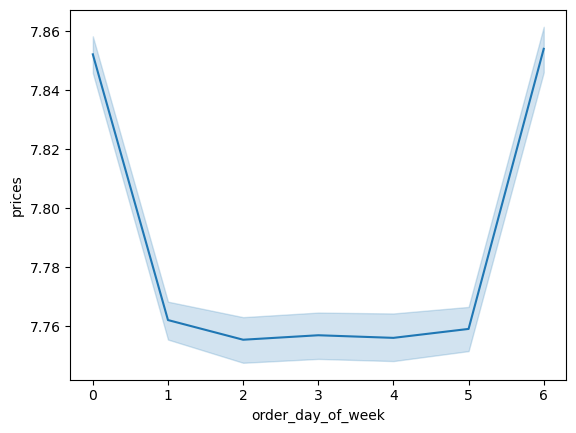

In [33]:
# creating a line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

## 04 Visualization Exercises 

### 04a You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

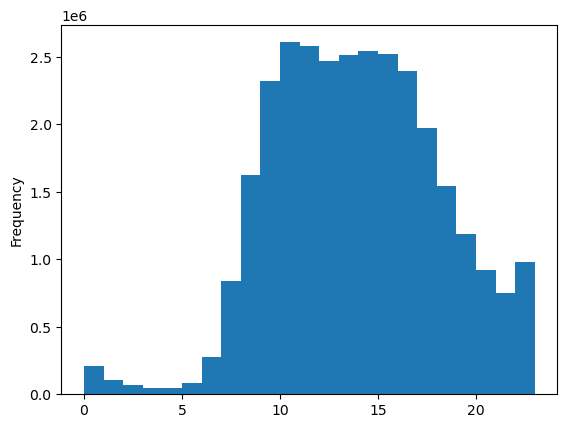

In [27]:
hist_hour = cust_ords_prods['order_hour_of_day'].plot.hist(bins=23)

#### The histogram above shows that relatively few orders are received in the early morning (12am-5am), and the majority of orders are received between the hours of 10am and 4pm. 

### 04b The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

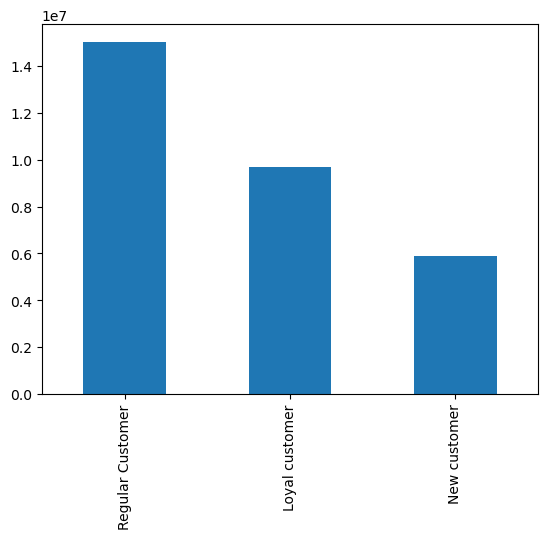

In [28]:
bar_loyalty = cust_ords_prods['loyalty_flag'].value_counts().plot.bar()

### 04c Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [29]:
# create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(5)
dev_2 = np.random.rand(len(cust_ords_prods)) <= 0.7

In [30]:
# creating two dataframes to split the sample into two sub-samples
# 70% of sample should be in dataframe big_2
# 30% of sample should be in dataframe small_2
big_2 = cust_ords_prods[dev_2]
small_2 = cust_ords_prods[~dev_2]

In [31]:
# paring down sub-samples into only the necessary column to speed up processing time
df_3 = small_2[['order_hour_of_day', 'prices']]

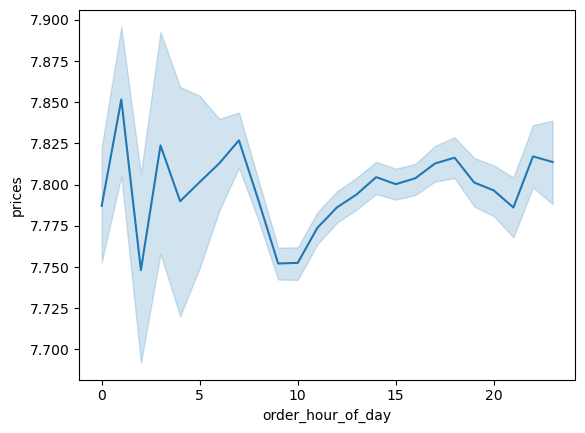

In [34]:
# creating a line chart
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

### 04d Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [35]:
# Using the same sub-samples and seed to create a new line chart of the family demographics 
df_4 = small_2[['age', 'n_dependants']]

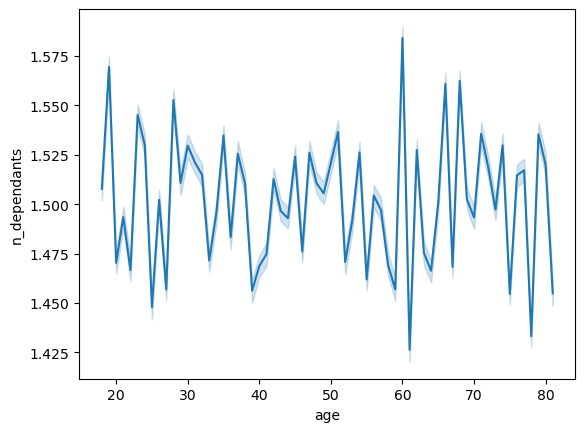

In [36]:
line_family = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

#### This line chart implies that there isn't a relationship between age and family situation.  Perhaps there is a better way to explore this relationship, such as a stacked bar chart

### 04e You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

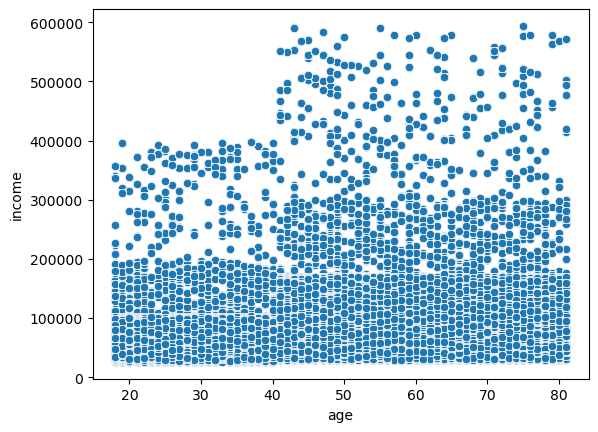

In [37]:
scatter_income = sns.scatterplot(data = cust_ords_prods, x = 'age' , y ='income' )

#### This scatterplot implies that while most people, regardless of age, will make below 200,000 anually.  There is a smaller group of younger people who make between 200k and 400k, and a slightly larger group of older individuals who make between 200k and 300k, as well as another small group of older individuals who make between 400k and 600k.  These three additional groups might create good demographics to attempt targeted marketing campaigns

## 05 Exporting Dataframe and Visualizations

### 05a Exporting Visualizations

In [40]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_of_week.png'))

In [41]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [42]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_prices.png'))

In [43]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_day_of_week.png'))

In [44]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day.png'))

In [45]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

In [46]:
line_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day.png'))

In [47]:
line_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_family.png'))

In [48]:
scatter_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income.png'))

### 05b Exporting Dataframe

In [49]:
cust_ords_prods.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_cleaned.pkl'))